<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.io import *
from taiko.tools.database import *
from taiko.profile import *
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os

sns.set(font_scale=1.5)

In [3]:
record_df = load_record_df(song_id=99)
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
0,aaaaa,99,L_2018-09-28_111140.csv,R_2018-09-28_111142.csv,capture_2018_09_28_11_11_42
24,carolyn,99,L_2018-09-27_154737.csv,R_2018-09-27_154737.csv,capture_2018_09_27_15_47_37
41,cuxi,99,L_2018-09-25_154843.csv,R_2018-09-25_154847.csv,capture_2018_09_25_15_48_47
58,cuxi,99,L_2018-09-26_113735.csv,R_2018-09-26_113737.csv,capture_2018_09_26_11_37_36
75,fatfat,99,L_2018-09-26_200112.csv,R_2018-09-26_200114.csv,capture_2018_09_26_20_01_13
92,eve,99,L_2018-09-26_171226.csv,R_2018-09-26_171225.csv,capture_2018_09_26_17_12_25
109,eve,99,L_2018-09-28_161808.csv,R_2018-09-28_161809.csv,capture_2018_09_28_16_18_09
126,oliver,99,L_2018-09-26_183904.csv,R_2018-09-26_183921.csv,capture_2018_09_26_18_39_20
144,oliver,99,L_2018-09-28_151120.csv,R_2018-09-28_151122.csv,capture_2018_09_28_15_11_22
161,chris,99,L_2018-09-26_132923.csv,R_2018-09-26_132926.csv,capture_2018_09_26_13_29_25


In [4]:
for drummer_name in tqdm(get_all_drummers()):
    create_profile(drummer_name)

100%|██████████| 12/12 [00:43<00:00,  4.12s/it]


In [4]:
get_profile('aaaaa')

,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_VI,L_G_VI,...,R_GX_FR,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type
0,3.9275,14.9631,0.2284,3.8673,0.6172,3.3195,14.2499,2.2618,0.0040,30.3524,...,47.3786,92.6209,15.9058,-0.4480,0.8114,-0.6615,0.9898,0.6426,0.6989,1
1,4.0190,18.1377,0.0705,3.9631,0.6210,4.2206,17.3308,1.9969,0.0169,21.8443,...,37.9761,62.9151,55.2246,-0.9474,0.9037,-0.9220,0.9141,0.6986,0.5876,1
2,4.0236,13.0400,0.0797,3.9863,0.4837,4.9670,11.2247,-0.6386,0.0224,27.8211,...,72.2169,81.6192,176.5076,-0.8588,-0.0805,0.1700,0.3495,-0.0101,0.9290,1
3,3.8817,11.5477,0.1054,3.8125,0.6401,5.3345,9.4844,-1.5474,0.0480,10.8400,...,125.3296,255.4595,293.2647,0.1073,0.8114,-0.3292,0.9283,-0.3907,-0.1303,1
4,3.9184,17.8125,-0.0924,3.8385,0.6610,8.2228,15.0954,0.7883,0.1613,33.4376,...,188.7329,601.0376,339.2394,-0.0088,0.5145,-0.3856,0.9546,-0.5920,-0.4688,1
5,4.1393,17.0307,-0.1970,4.1014,0.2799,9.4942,6.5689,2.3622,0.1570,38.2150,...,193.5699,640.8692,301.6815,0.0430,0.1501,0.0555,0.9274,-0.6073,-0.4211,1
6,3.9818,18.5457,-0.1735,3.9525,0.0470,9.7296,8.3537,2.1609,0.2092,88.5457,...,125.9918,434.2682,309.3872,0.7447,0.5711,0.1300,0.7668,-0.8121,-0.3206,1
7,4.0699,18.6362,-0.2528,4.0221,-0.1310,7.7808,12.4086,5.2966,0.2858,91.1217,...,92.6819,321.4752,333.1451,0.7817,0.4584,0.0606,0.4203,-0.5448,0.4920,1
8,3.9466,15.9268,-0.1329,3.8979,-0.1194,1.8603,11.0576,6.1554,0.3315,35.4394,...,142.9291,420.8832,351.6388,0.4283,0.5776,0.2290,0.8782,-0.0981,0.3126,1
9,3.8751,18.4633,-0.0771,3.8387,-0.0603,0.5273,12.7156,8.8432,0.2303,17.6485,...,133.5419,420.8832,327.1698,0.3827,0.5499,0.2712,0.8733,-0.3636,-0.0137,1


195


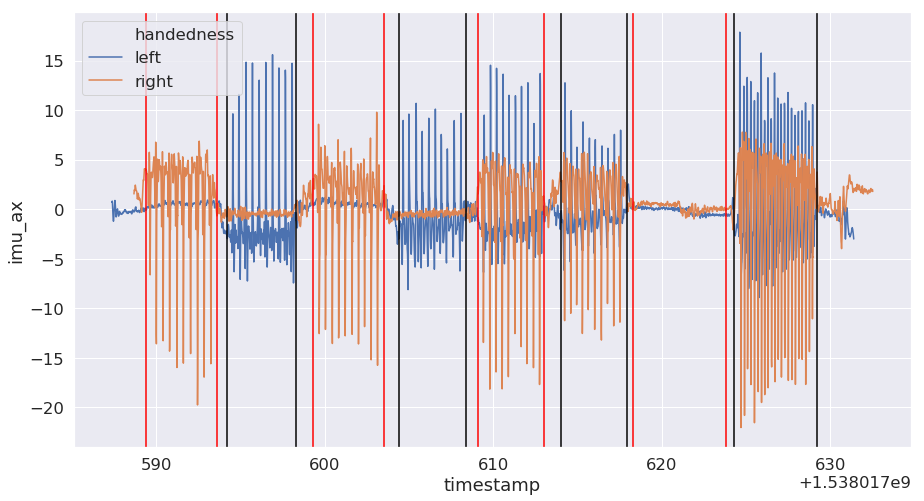

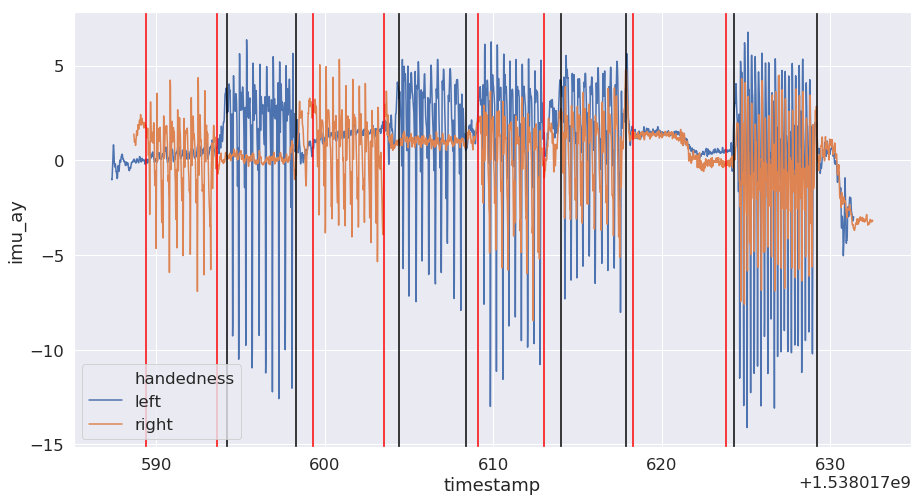

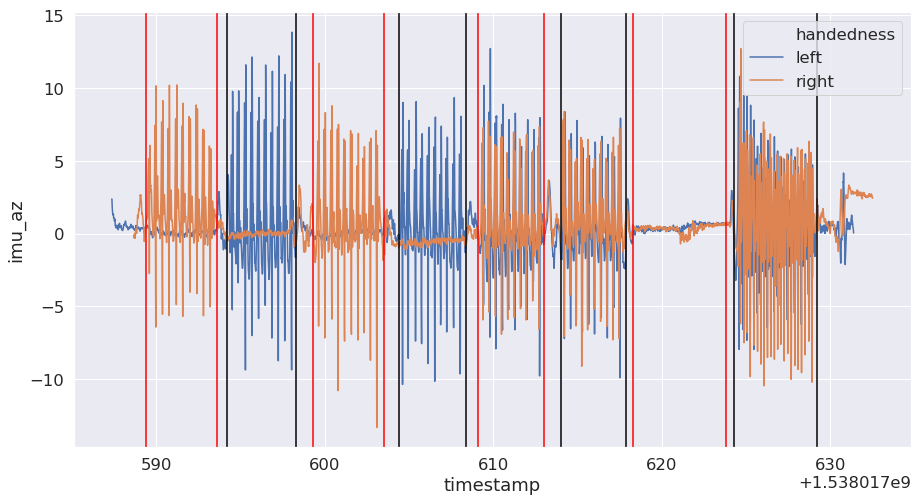

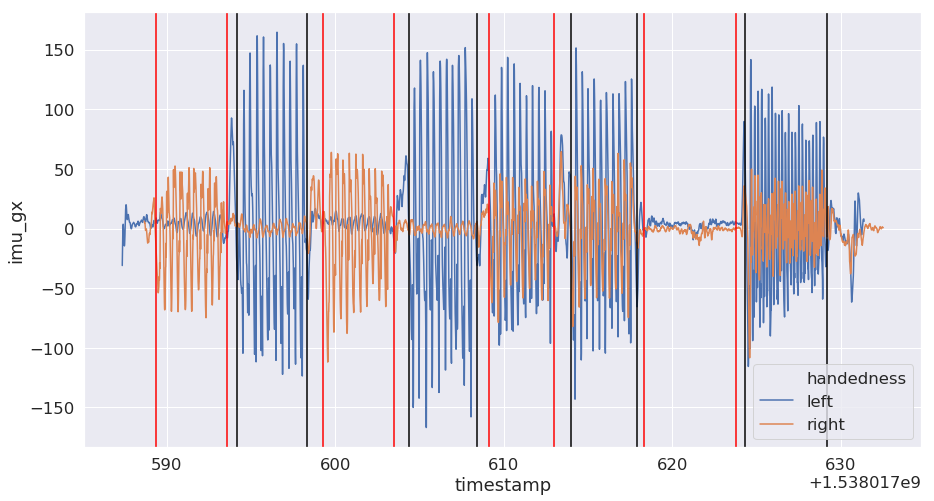

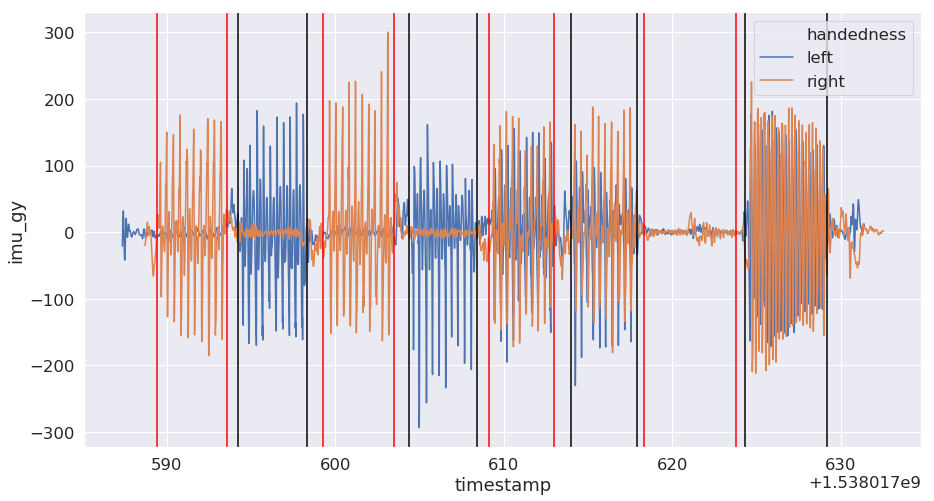

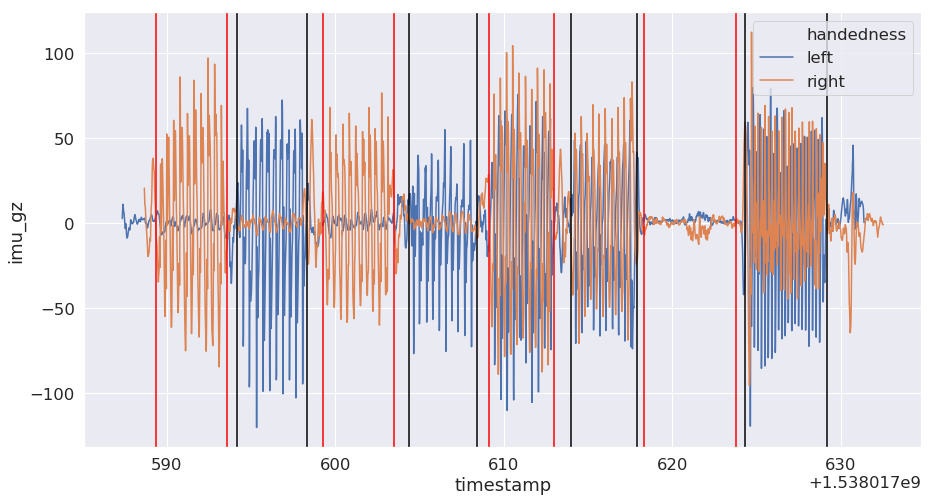

213


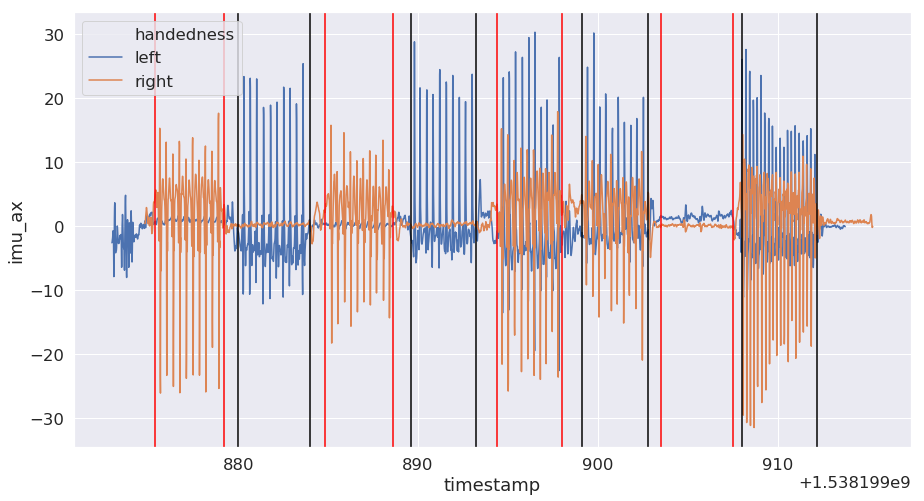

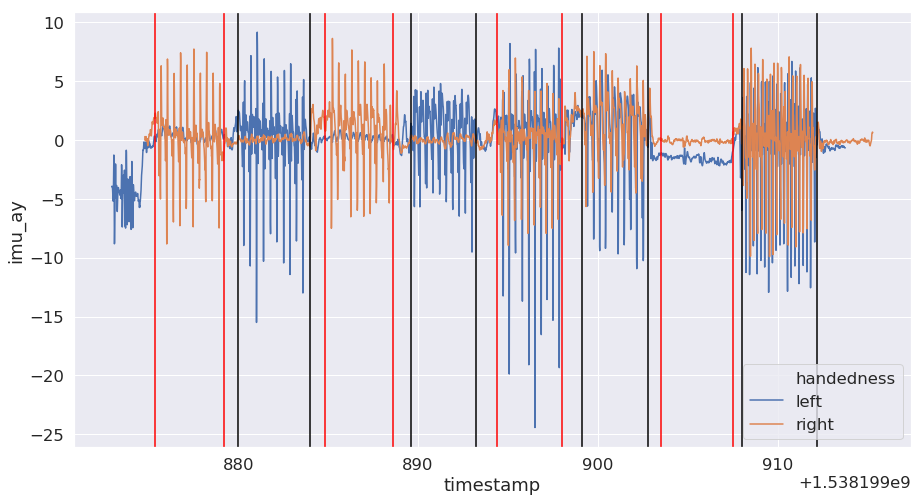

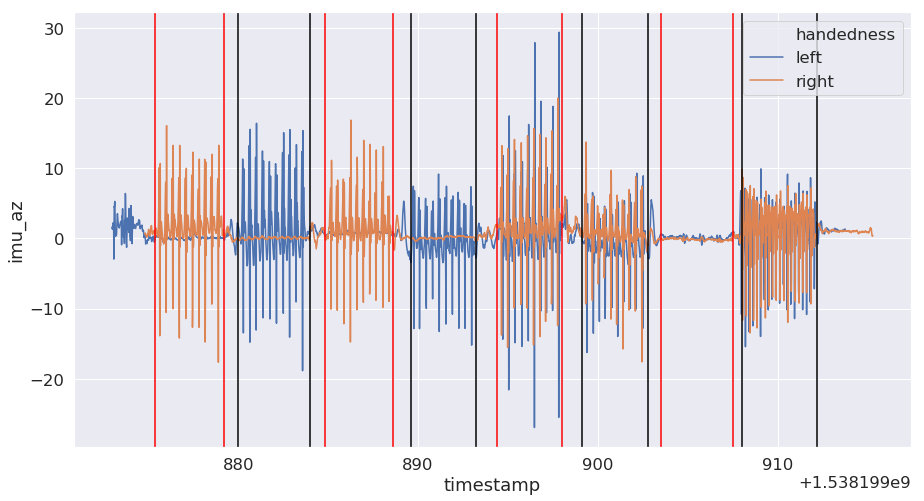

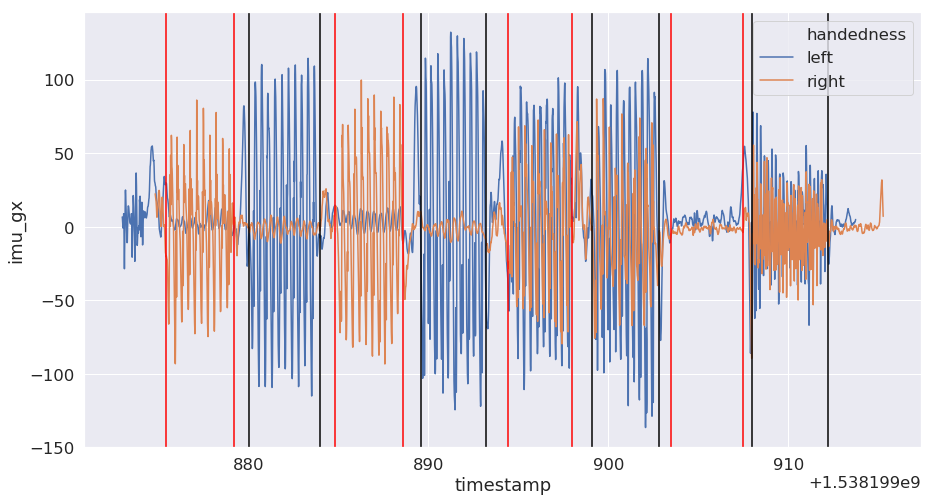

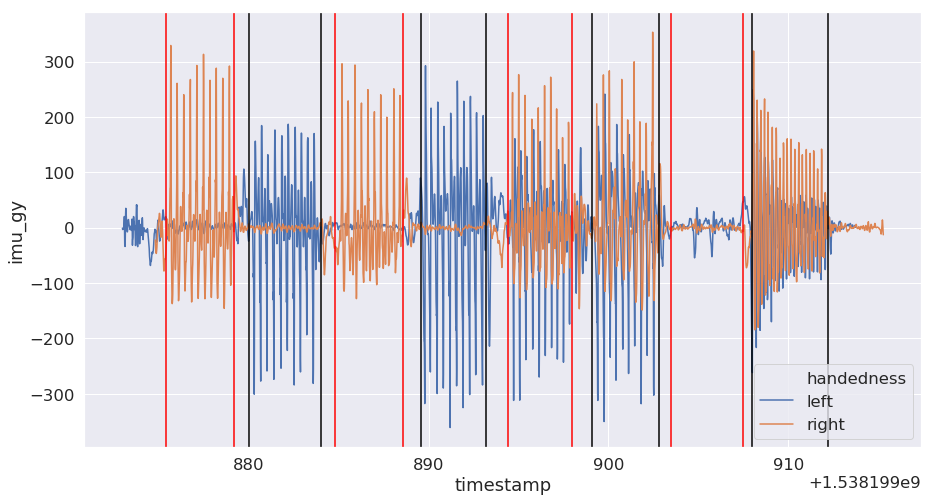

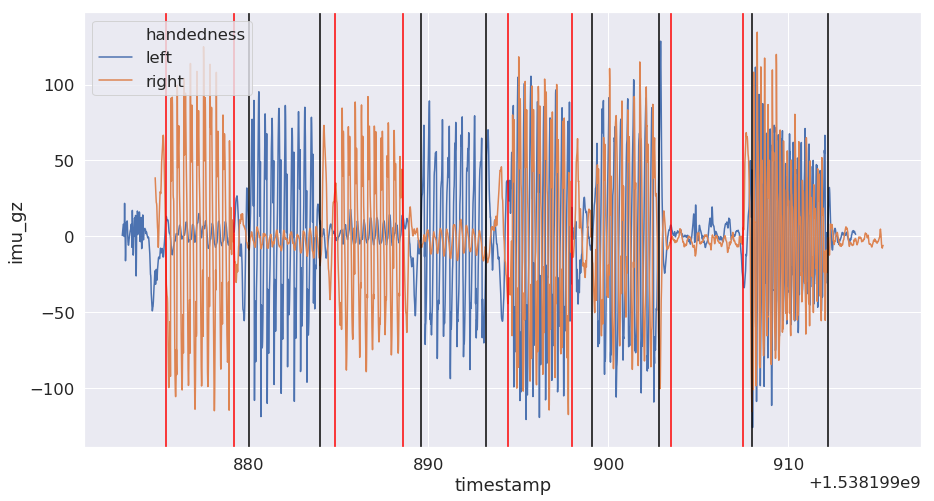

In [7]:
plot_profile('sheep')

In [ ]:
new_id = 0
for id_, row in record_df.iterrows():
    print(id_)
#     if id_ < 323:
#         continue
    left_sensor_name = row['left_sensor_datetime']
    right_sensor_name = row['right_sensor_datetime']
    who_name = row['drummer_name']
    song_id = row['song_id']
    
    dirs = glob('../data/alpha/' + who_name + '/*/sensor_data/' + left_sensor_name)
    left_df = pd.read_csv(dirs[0])

    dirs = glob('../data/alpha/' + who_name + '/*/sensor_data/' + right_sensor_name)
    right_df = pd.read_csv(dirs[0])

    left_df['handedness'] = 'left'
    right_df['handedness'] = 'right'

    profile_df = pd.concat([left_df, right_df], ignore_index=True)
    profile_df.dropna(inplace=True)
    print(profile_df)
    new_row = [who_name, left_sensor_name, right_sensor_name]
    profile_record_df.loc[new_id] = new_row + [np.nan] * len(PREFIX) * len(SUFFIX)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='timestamp', y='imu_az', data=profile_df, hue='handedness')
    for e_id, x_ in enumerate(ref_avline[new_id]):
        color_ = 'black'
        if e_id // 2 % 2 == 0:
            color_ = 'red'
        plt.axvline(x=x_, color=color_)
    plt.show()
    new_id += 1
# profile_record_df.to_csv('profile_record_df.csv', index=False)